In [9]:
import numpy as np
import wavload
import librosa
import math        
import pyaudio  
import random
import scipy
from scipy import signal
import matplotlib.pyplot as plt
from librosa.core import stft
import librosa
import librosa.display
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from random import randrange
#import tensorflow as tf


from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
#import tflearn
#import keras

In [4]:
"""variable freqs only - synth 1"""
num_tones = 6

f = 440
srate = 11025
frame_count = 44100
clips = 5
output = np.zeros((clips, frame_count),dtype=(np.float16))
Y = np.zeros((clips, num_tones))

#amplitudes = np.random.uniform(0, 1/num_tones, num_tones)
amplitudes = 1/num_tones
    
ratios = np.random.uniform(1, randrange(2, 12), size = (clips,num_tones))
ratios[:,0] = 1
ratios = np.sort(ratios)
 
#rates = np.random.uniform(0.9995, 0.99999, num_tones)
#rates = -np.sort(-rates)
#t = 0
rates = 0.99999
Y = ratios

#for i in range(0, frame_count):
for ot in range(0, num_tones):
    overtone_data = (np.tile((amplitudes**(np.arange(frame_count)/10000*rates)),(clips,1)))*(np.sin(2*np.pi * ((np.tile((np.arange(frame_count)),(clips,1))) * (ratios[:,ot])[:,np.newaxis]) *f / srate)).astype(np.float16)
    output = np.add(output,overtone_data)
print(ot)

    #amplitudes = amplitudes * rates
    #t = t + 1
#output = output * 1000
#output = output.astype('int16')


5


In [10]:
"""variable decay rates only"""

num_tones = 6

f = 440
srate = 11025
frame_count = 44100
clips = 5
output = np.zeros((clips, frame_count),dtype=(np.float16))
Y = np.zeros((clips, num_tones*2))

for c in range(0, clips):
    #amplitudes = np.random.uniform(0, 1/num_tones, num_tones)
    amplitudes = np.repeat([1/num_tones], num_tones)
    
    ratios = np.arange(1, num_tones +1)
    #ratios[0] = 1
    #ratios = np.sort(ratios)
    
    rates = np.random.uniform(0.9995, 0.99999, num_tones)
    rates = -np.sort(-rates)
    #t = 0
    Y[c] = np.concatenate((ratios, rates))

    #for i in range(0, frame_count):
    for ot in range(0, num_tones):
        output[c] += (amplitudes[ot]**(np.arange(frame_count)/10000*rates[ot]))*(np.sin(2*np.pi * np.arange(frame_count)* f * ratios[ot] / srate)).astype(np.float32)
    print(c)

    #amplitudes = amplitudes * rates
    #t = t + 1
#output = output * 1000
#output = output.astype('int16')


TypeError: 'numpy.ndarray' object is not callable

In [11]:
"""freqs + decay rates"""
num_tones = 6

f = 440
srate = 11025
frame_count = 44100
clips = 5
output = np.zeros((clips, frame_count),dtype=(np.float16))
Y = np.zeros((clips, num_tones*2))

for c in range(0, clips):
    #amplitudes = np.random.uniform(0, 1/num_tones, num_tones)
    amplitudes = np.repeat([1/num_tones], num_tones)
    
    ratios = np.random.uniform(1, randrange(2, 12), num_tones)
    ratios[0] = 1
    ratios = np.sort(ratios)
    
    rates = np.random.uniform(0.9995, 0.99999, num_tones)
    rates = -np.sort(-rates)
    #t = 0
    Y[c] = np.concatenate((ratios, rates))

    #for i in range(0, frame_count):
    for ot in range(0, num_tones):
        output[c] += (amplitudes[ot]**(np.arange(frame_count)/10000*rates[ot]))*(np.sin(2*np.pi * np.arange(frame_count)* f * ratios[ot] / srate)).astype(np.float32)
    print(c)

    #amplitudes = amplitudes * rates
    #t = t + 1
#output = output * 1000
#output = output.astype('int16')


TypeError: 'numpy.ndarray' object is not callable

In [4]:
"""Transformer Model Mark 1 from Additive Synth Mark 2"""

class PositionalEncoding(object):
    def __init__(self, position, d):
        angle_rads = self._get_angles(np.arange(position)[:, np.newaxis], np.arange(d)[np.newaxis, :], d)

        sines = np.sin(angle_rads[:, 0::2])
        cosines = np.cos(angle_rads[:, 1::2])
        self._encoding = np.concatenate([sines, cosines], axis=-1)
        self._encoding = self._encoding[np.newaxis, ...]
    
    def _get_angles(self, position, i, d):
        angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d))
        return position * angle_rates
    
    def get_positional_encoding(self):
        return tf.cast(self._encoding, dtype=tf.float32)


In [5]:
positional_encoding = PositionalEncoding(50, 512)
positional_encoding_values = positional_encoding.get_positional_encoding()

print("Positional Encoding Example:")
print("-----------")
print(positional_encoding_values)
print("-----------")

Positional Encoding Example:
-----------
Tensor("Cast:0", shape=(1, 50, 512), dtype=float32)
-----------


In [285]:
"""Modal synth Mark 1"""

fs = 44100       # sampling rate, Hz, must be integer
duration = 5     # in seconds, may be float

num_samples = 10
num_overtones = 2

overtones = np.random.uniform (20 , 20000 , size = (num_samples,num_overtones))
overtones = np.sort(overtones,axis=1)
amp  = np.random.uniform (1,10   , size = (num_samples,num_overtones))
#amp = np.sort(amp, axis = 1)
#amp = np.flip(amp,axis=1)
audio = np.zeros((num_samples,(fs*duration)))
d = np.linspace(0.001,0.01, num = num_overtones)


for i in range (0,num_samples):
    combined_sine = np.zeros((1,(fs*duration)))
    for j in range (0,num_overtones):
        sine = ((amp[i][j]**(-d[j]*np.arange(fs*duration))/fs)*(np.sin(2*np.pi*np.arange(fs*duration)*overtones[i][j]/fs))).astype(np.float32)
        combined_sine = combined_sine + sine
    audio[i] = combined_sine
audio = audio/num_overtones
print(audio.shape)

(10, 220500)


In [282]:
"""Additive synth Mark 3"""

fs = 44100       # sampling rate, Hz, must be integer
duration = 5   # in seconds, may be float

num_samples = 10
num_overtones = 1

overtones = np.random.uniform (20 , 20000 , size = (num_samples,num_overtones))
amp  = np.random.uniform (0  , 1    , size = (num_samples,num_overtones))
audio = np.zeros((num_samples,(fs*duration)))
print(audio.shape)

for i in range (0,num_samples):
    combined_sine = np.zeros((1,(fs*duration)))
    for j in range (0,num_overtones):
        sine = (amp[i][j]*(np.sin(2*np.pi*np.arange(fs*duration)*overtones[i][j]/fs))).astype(np.float32)
        combined_sine = combined_sine + sine
    audio[i] = combined_sine
audio = audio/num_overtones
print(audio.shape)
    

   

(10, 220500)
(10, 220500)


In [8]:
# for paFloat32 sample values must be in range [-1.0, 1.0]
p = pyaudio.PyAudio()
fs=srate

stream = p.open(format=pyaudio.paFloat32,
                    channels=1,
                    rate=fs,
                    output=True)

# play. May repeat with different volume values (if done interactively) 
stream.write(output[3])

stream.stop_stream()
stream.close()

p.terminate()



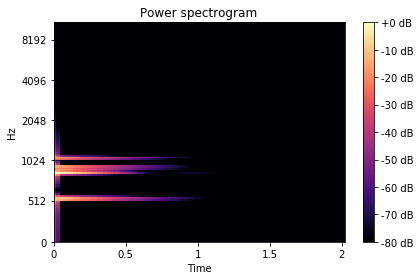

In [16]:
Spectogram = np.abs(librosa.feature.melspectrogram(output[0], sr=fs, n_mels=128))
librosa.display.specshow(librosa.amplitude_to_db(Spectogram,
                        ref=np.max),
                          y_axis='mel', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

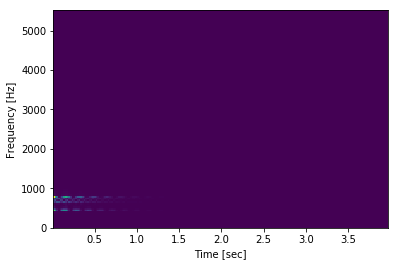

In [12]:

f, t, Sxx = signal.spectrogram(output[1], fs)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [3]:
"""Additive synth - Mark 2 """

fs = 22050      # sampling rate, Hz, must be integer
duration = 5   # in seconds, may be float

num_samples = 10
freq = np.zeros((num_samples,10))
amp = np.zeros((num_samples,10))
X_data = np.zeros((num_samples,fs*duration))


for i in range (0,num_samples):
    freq1 = random.uniform(16,2000)        # sine frequency, Hz, may be float
    freq2 = 2*freq1
    freq3 = 3*freq1
    freq4 = 4*freq1
    freq5 = 5*freq1
    freq6 = 6*freq1
    freq7 = 7*freq1
    freq8 = 8*freq1
    freq9 = 9*freq1
    freq10 = 10*freq1

    amp1 = random.uniform(0,1)     # range [0.0, 1.0]
    amp2 = random.uniform(0,amp1)
    amp3 = random.uniform(0,amp2)
    amp4 = random.uniform(0,amp3)
    amp5 = random.uniform(0,amp4)
    amp6 = random.uniform(0,amp5)
    amp7 = random.uniform(0,amp6)
    amp8 = random.uniform(0,amp7)
    amp9 = random.uniform(0,amp8)
    amp10 = random.uniform(0,amp9)


    # generate samples, note conversion to float32 array
    sample1 = (amp1*(np.sin(2*np.pi*np.arange(fs*duration)*freq1/fs))).astype(np.float32)
    sample2 = (amp2*(np.sin(2*np.pi*np.arange(fs*duration)*freq2/fs))).astype(np.float32)
    sample3 = (amp3*(np.sin(2*np.pi*np.arange(fs*duration)*freq3/fs))).astype(np.float32)
    sample4 = (amp4*(np.sin(2*np.pi*np.arange(fs*duration)*freq4/fs))).astype(np.float32)
    sample5 = (amp5*(np.sin(2*np.pi*np.arange(fs*duration)*freq5/fs))).astype(np.float32)
    sample6 = (amp6*(np.sin(2*np.pi*np.arange(fs*duration)*freq6/fs))).astype(np.float32)
    sample7 = (amp7*(np.sin(2*np.pi*np.arange(fs*duration)*freq7/fs))).astype(np.float32)
    sample8 = (amp8*(np.sin(2*np.pi*np.arange(fs*duration)*freq8/fs))).astype(np.float32)
    sample9 = (amp9*(np.sin(2*np.pi*np.arange(fs*duration)*freq9/fs))).astype(np.float32)
    sample10 = (amp10*(np.sin(2*np.pi*np.arange(fs*duration)*freq10/fs))).astype(np.float32)

    audio = ((sample1
                 +sample2
                 +sample3
                 +sample4
                 +sample5
                 +sample6
                 +sample7
                 +sample8
                 +sample9
                 +sample10)/10)

    freq[i] = (freq1,freq2,freq3,freq4,freq5,freq6,freq7,freq8,freq9,freq10)    
    amp[i] = (amp1,amp2,amp3,amp4,amp5,amp6,amp7,amp8,amp9,amp10)
    X_data[i] = audio
    print(freq.shape)
    


(10, 10)
(10, 10)
(10, 10)
(10, 10)
(10, 10)
(10, 10)
(10, 10)
(10, 10)
(10, 10)
(10, 10)


In [ ]:
# for paFloat32 sample values must be in range [-1.0, 1.0]

p = pyaudio.PyAudio()

stream = p.open(format=pyaudio.paFloat32,
                    channels=1,
                    rate=fs,
                    output=True)

# play. May repeat with different volume values (if done interactively) 
stream.write(audio)

stream.stop_stream()
stream.close()

p.terminate()


In [90]:
"""Additive synth Mark 1 """

PyAudio = pyaudio.PyAudio     

BITRATE = 44100     #number of frames per second/frameset.      

FREQUENCY1 = 200     #Hz, waves per second, 261.63=C4-note.
FREQUENCY2 = 400
FREQUENCY3 = 600
FREQUENCY4 = 100
LENGTH = 1     #seconds to play sound



NUMBEROFFRAMES = int(BITRATE * LENGTH)
RESTFRAMES = NUMBEROFFRAMES % BITRATE
WAVEDATA = ''    

#generating wawes
for x in range(NUMBEROFFRAMES):
    WAVEDATA = WAVEDATA+chr(int(math.sin(x/((BITRATE/FREQUENCY1)/math.pi))*127+128)
                            +int(math.sin(x/((BITRATE/FREQUENCY2)/math.pi))*127+128)
                            +int(math.sin(x/((BITRATE/FREQUENCY3)/math.pi))*127+128)
                           +int(math.sin(x/((BITRATE/FREQUENCY4)/math.pi))*127+128))   

for x in range(RESTFRAMES): 
    WAVEDATA = WAVEDATA+chr(128)

p = PyAudio()
stream = p.open(format = p.get_format_from_width(1), 
                channels = 1, 
                rate = BITRATE, 
                output = True)

stream.write(WAVEDATA)
stream.stop_stream()
stream.close()
p.terminate()

In [ ]:
"""Writing wav file"""

w = wave.open(filename, 'w')


In [45]:
"""Loading audio data"""

num_data = 1
num_params = 16
samp_length = 229411
sr = 44100

X_data = np.zeros(shape=(num_data,samp_length))
print(X_data.shape)

for r in range(0, num_data):
    audio = wavload.readwav('C:/Users/arshi/Desktop/FM Synth Data/BeepBoop.wav')[2]
    print(audio)
    audio = audio.T[0]
    if(audio.shape != samp_length):
        padded = np.zeros(shape=(samp_length))
        padded[:np.shape(audio)[0]] = audio
        audio = padded
    X_data[r] = audio
    print(X_data[0].shape)
    

(1, 229411)
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
(229411,)


In [ ]:
"""LSTM network"""

model = Sequential()
model.add(LSTM(128))
model.add(Dense(units=20, activation='relu'))
model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=['accuracy'])
model.fit(MFCC, Y_data)

In [ ]:
outs = model.predict(MFCC)